<a href="https://colab.research.google.com/github/anasjy/face-emotion-recognition/blob/main/fcr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install deepface

     |████████████████████████████████| 62 kB 1.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3 MB 20.4 MB/s 
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14273 sha256=e34698a53ba0460b750be54cee8e74ec443ac7a2aad79b55b5c25a35b449659e
  Stored in directory: /root/.cache/pip/wheels/8c/17/ff/58721d1fabdb87c21a0529948cf39e2be9af90ddbe4ad65944
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [1]:
pip install -U numpy 

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from deepface import DeepFace

In [3]:
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
img = cv2.imread("/content/drive/MyDrive/fcr/sadwomen.jpg")

In [6]:
img

array([[[ 49,  55,  60],
        [ 48,  54,  59],
        [ 48,  54,  59],
        ...,
        [ 32,  36,  37],
        [ 32,  36,  37],
        [ 32,  36,  37]],

       [[ 49,  55,  60],
        [ 48,  54,  59],
        [ 48,  54,  59],
        ...,
        [ 32,  36,  37],
        [ 32,  36,  37],
        [ 32,  36,  37]],

       [[ 49,  55,  60],
        [ 48,  54,  59],
        [ 48,  54,  59],
        ...,
        [ 32,  36,  37],
        [ 32,  36,  37],
        [ 32,  36,  37]],

       ...,

       [[ 59,  71,  59],
        [ 59,  71,  59],
        [ 59,  71,  59],
        ...,
        [110,  85,  53],
        [110,  85,  53],
        [110,  85,  53]],

       [[ 59,  71,  59],
        [ 59,  71,  59],
        [ 59,  71,  59],
        ...,
        [109,  84,  52],
        [109,  84,  52],
        [109,  84,  52]],

       [[ 60,  72,  60],
        [ 60,  72,  60],
        [ 60,  72,  60],
        ...,
        [106,  82,  52],
        [106,  82,  52],
        [106,  82,  52]]

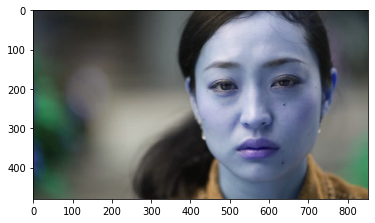

In [7]:
plt.imshow(img)

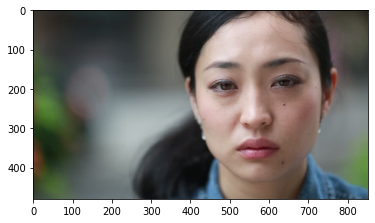

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [9]:
predictions = DeepFace.analyze(img) 

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


In [12]:
predictions

{'age': 30,
 'dominant_emotion': 'sad',
 'dominant_race': 'asian',
 'emotion': {'angry': 0.41948182214688196,
  'disgust': 7.245880061524072e-06,
  'fear': 0.15583320983995258,
  'happy': 1.2436237670405055e-06,
  'neutral': 0.05470327776950763,
  'sad': 99.3699729067071,
  'surprise': 1.9505098699714743e-07},
 'gender': 'Woman',
 'race': {'asian': 99.43853616714478,
  'black': 0.00026393843199912226,
  'indian': 0.16258301911875606,
  'latino hispanic': 0.32218098640441895,
  'middle eastern': 0.0002800621359710931,
  'white': 0.07615931681357324},
 'region': {'h': 395, 'w': 395, 'x': 371, 'y': 36}}

In [10]:
predictions['dominant_emotion']

'sad'

In [14]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       #print facecascade.empty
faces = faceCascade.detectMultiScale(gray,1.1,4)       



       #draw rectangle around faces
for(x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2) 

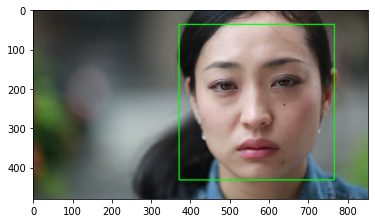

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [17]:
font = cv2.FONT_HERSHEY_SIMPLEX


      #use puttext() method for
      # inserting text on video
cv2.putText(img,
                predictions['dominant_emotion'],
                (0, 50),
                font, 3,
                (0, 0, 255),
                3,
                cv2.LINE_4) ;

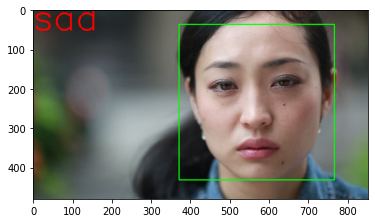

In [18]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [19]:
img = cv2.imread('/content/drive/MyDrive/fcr/expression1.jpg')

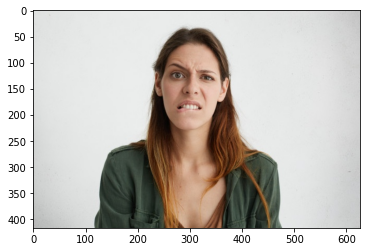

In [20]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [21]:
predictions = DeepFace.analyze(img) 


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]


In [22]:
predictions

{'age': 33,
 'dominant_emotion': 'fear',
 'dominant_race': 'latino hispanic',
 'emotion': {'angry': 2.232339179953288,
  'disgust': 0.029283356269947068,
  'fear': 93.68436298873203,
  'happy': 0.036574256225258485,
  'neutral': 0.05378246744356856,
  'sad': 3.5503441721406084,
  'surprise': 0.41331669916610114},
 'gender': 'Woman',
 'race': {'asian': 5.145436832036784,
  'black': 1.6111602104401714,
  'indian': 10.178821395565354,
  'latino hispanic': 29.88005458593694,
  'middle eastern': 28.501282841043643,
  'white': 24.68324748773858},
 'region': {'h': 139, 'w': 139, 'x': 237, 'y': 71}}

# **Real video face detection**

In [23]:
import cv2

from deepface import DeepFace

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")



while True:
    ret, frame = cap.read()
    result = DeepFace.analyze(frame, actions= ['emotion'])
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)   
    
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    
    cv2.putText(frame,
                result['dominant_emotion'],
                (50, 50),
                font, 3,
                (0, 0, 255),
                3,
                cv2.LINE_4) 
    cv2.imshow('demo video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    
    
cap.release()
cv2.destroyAllWindows()          

OSError: ignored